# Census Income Project

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded=files.upload()

Saving census_income.csv to census_income.csv


In [3]:
#Import dataset
df=pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Problem Definition

Case of supervised ML with "Income" being the target variable.As the model has to predict whether the person makes income over 50K with 14 independent features, hence classification model can be built.Need to convert target variable in to binary 0 & 1.
0 - <=50K
1 - > 50K

# Data Analysis

In [4]:
#Check rows & columns
df.shape
#Rows=32560 , Columns=15

(32560, 15)

In [5]:
#Check null values
df.isnull().sum()
#No null values found

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
#Check data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#Check for unique values in target variable
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
#Check the target variables
df["Income"].value_counts()
#There is data imbalance.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
#Check no. of unique values in all the features
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
#Check the numeric data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
#Check skewness of the numerical features.
df.skew()
#Features: Age, Fnlwgt,Capital_gain,Capital_loss

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [12]:
#Check the correlation
df.corr()
#All the features are not well correlated with eachother.

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


In [13]:
#Lets check the features with object datatype
#1. Workclass
print(df["Workclass"].unique())
print(df["Workclass"].nunique())

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
9


Observation: 
1.Feature has a special character "?" has to be replaced with mode.

In [14]:
#2. Education
print(df["Education"].unique())
print(df["Education"].nunique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
16


In [15]:
#3. Marital_status
print(df["Marital_status"].unique())
print(df["Marital_status"].nunique())

[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
7


In [16]:
#4. Occupation
print(df["Occupation"].unique())
print(df["Occupation"].nunique())

[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
15


In [17]:
#5. Relationship
print(df["Relationship"].unique())
print(df["Relationship"].nunique())

[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
6


In [18]:
#6. Race
print(df["Race"].unique())
print(df["Race"].nunique())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
5


In [19]:
#7. Sex
print(df["Sex"].unique())
print(df["Sex"].nunique())

[' Male' ' Female']
2


In [20]:
#8. Native country
print(df["Native_country"].unique())
print(df["Native_country"].nunique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
42


# EDA

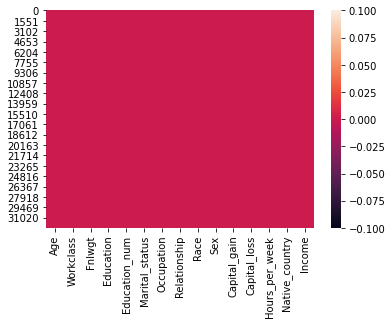

In [21]:
#Univariate anlysis
#Check data null values in data
sns.heatmap(df.isnull())

In [22]:
#Convert target variables by pd.getdummies
df["Income"]=pd.get_dummies(df["Income"],drop_first=True)

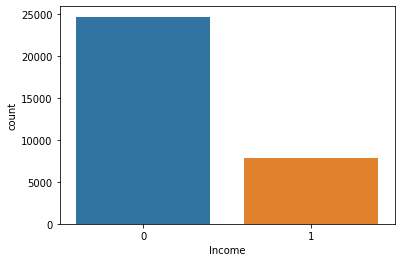

In [23]:
#Check target variables
sns.countplot(x="Income",data=df)

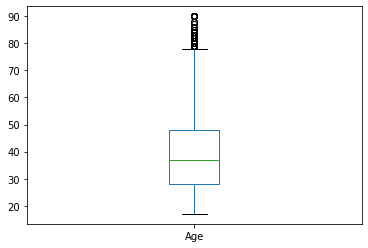

In [24]:
#Check outliers in numeric data using Boxplot
df["Age"].plot.box()

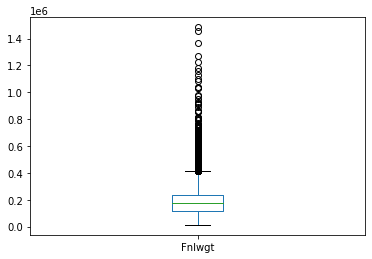

In [25]:
df["Fnlwgt"].plot.box()

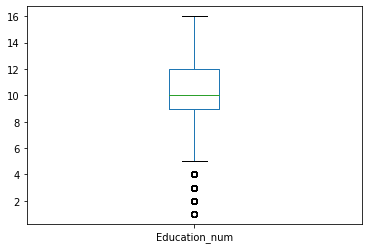

In [26]:
df["Education_num"].plot.box()

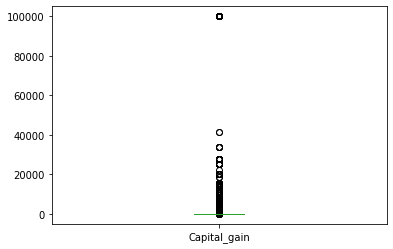

In [27]:
df["Capital_gain"].plot.box()

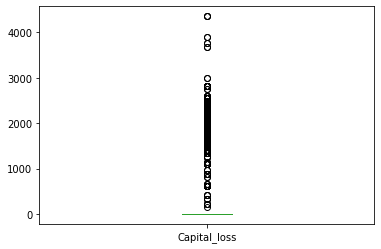

In [28]:
df["Capital_loss"].plot.box()

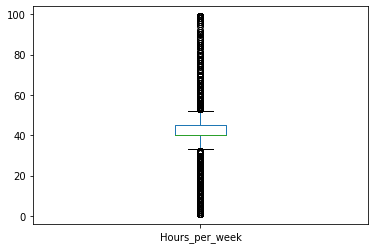

In [29]:
df["Hours_per_week"].plot.box()

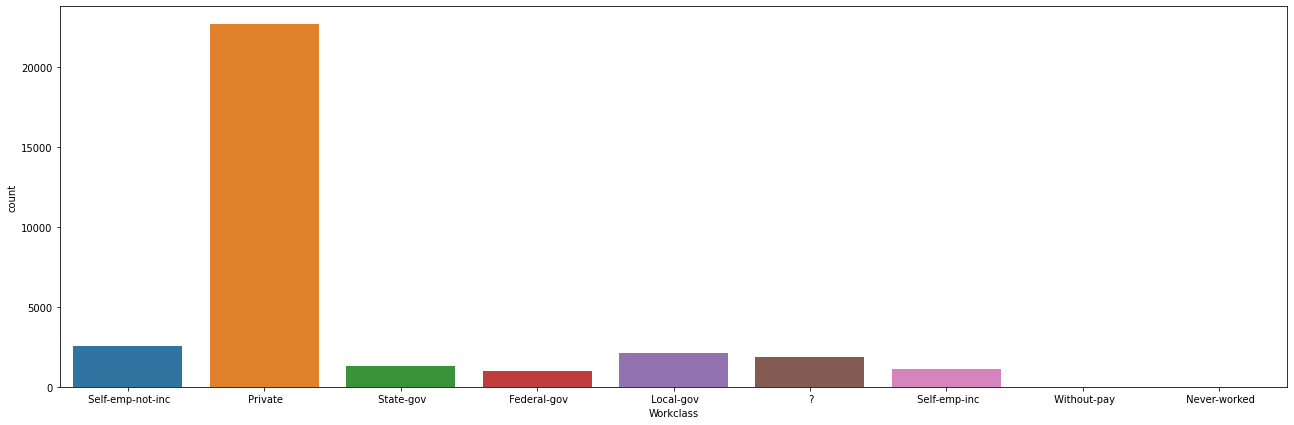

In [30]:
#Work class
plt.figure(figsize=(22,7))
sns.countplot(x="Workclass",data=df)

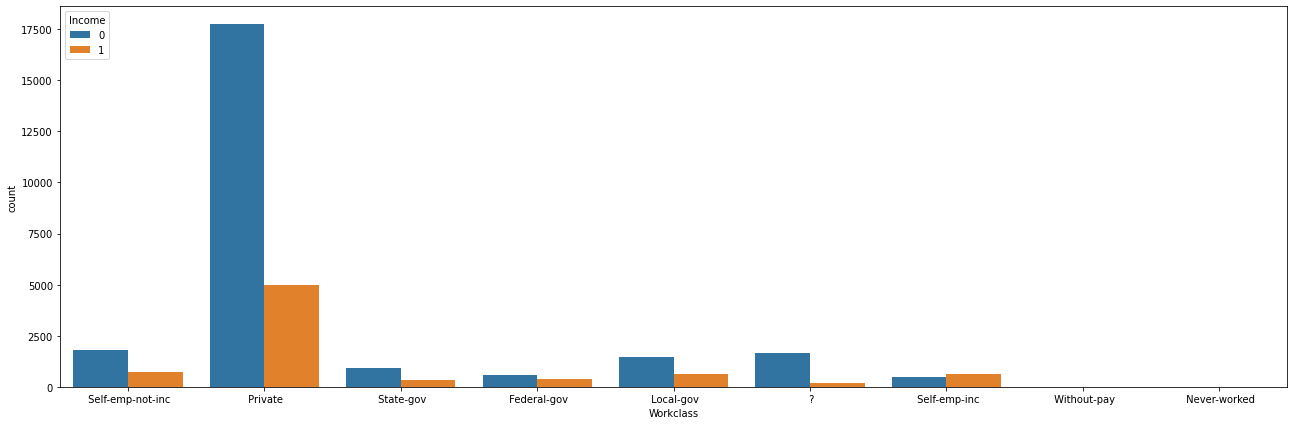

In [31]:
plt.figure(figsize=(22,7))
sns.countplot(x="Workclass",data=df,hue="Income")

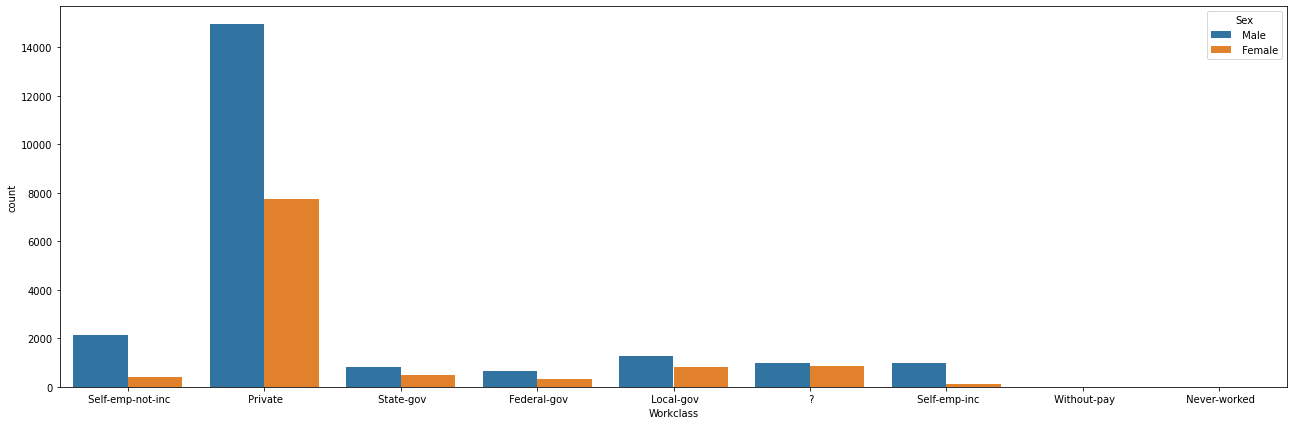

In [32]:
#Work class vs sex
plt.figure(figsize=(22,7))
sns.countplot(x="Workclass",data=df,hue="Sex")

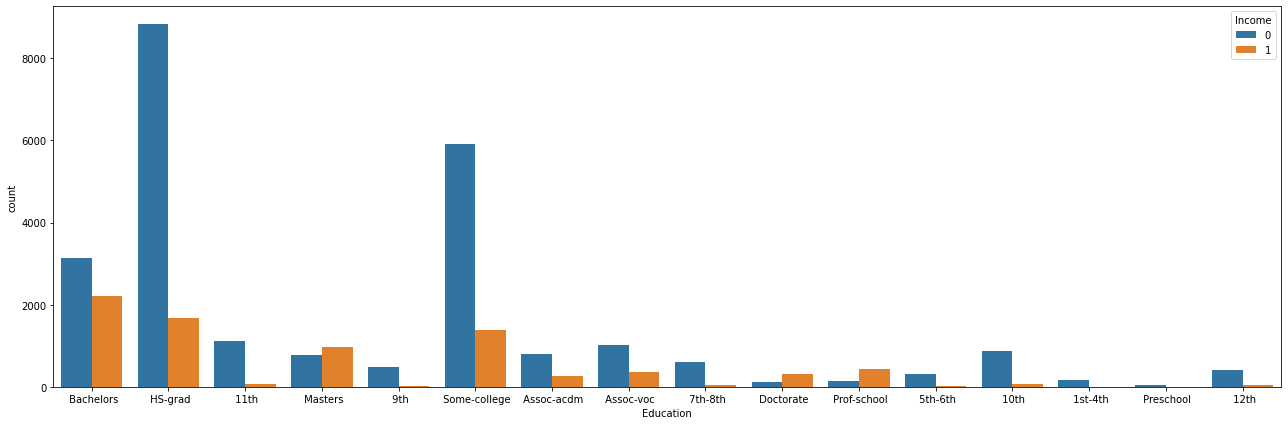

In [33]:
#Education
plt.figure(figsize=(22,7))
sns.countplot(x="Education",data=df,hue="Income")

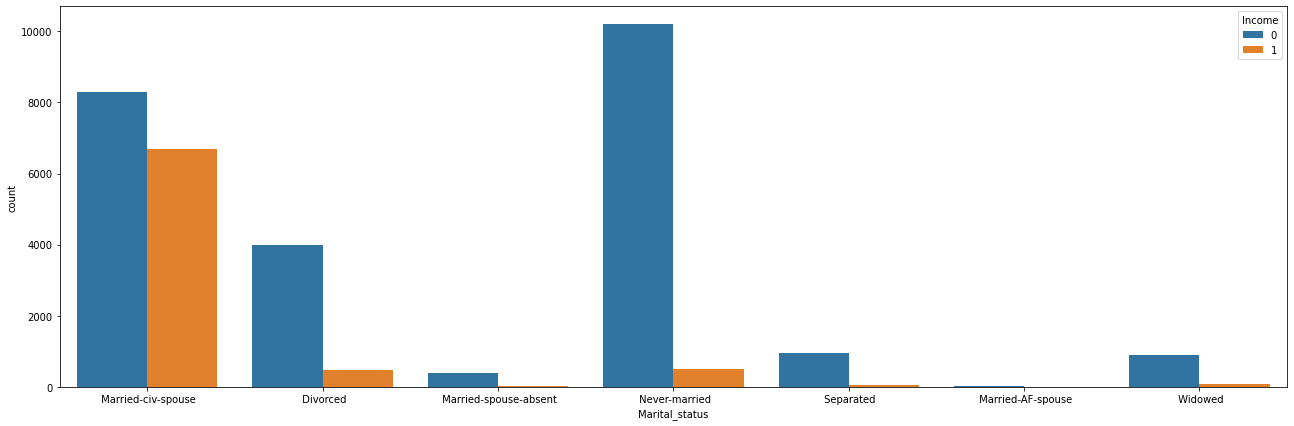

In [34]:
#Maritial Status
plt.figure(figsize=(22,7))
sns.countplot(x="Marital_status",hue="Income",data=df)

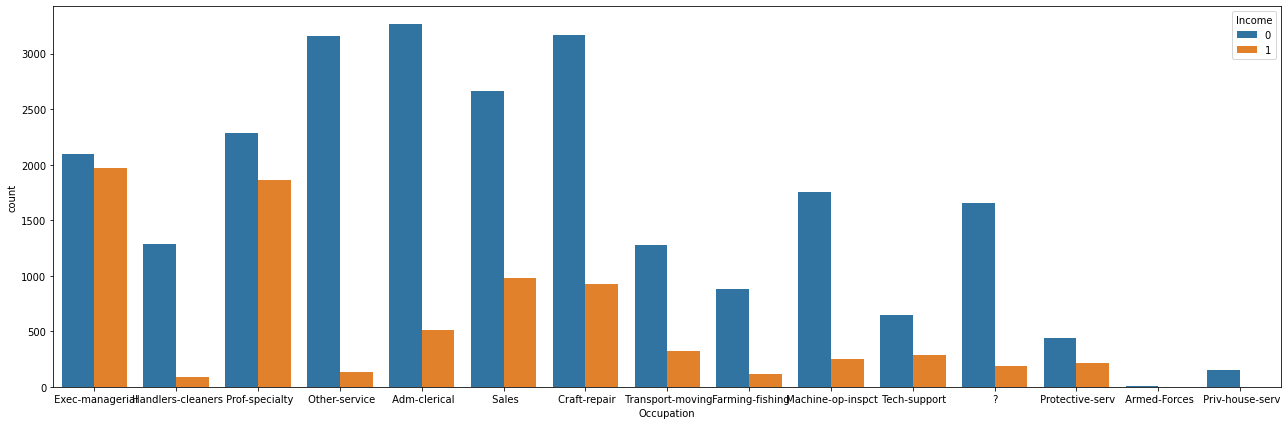

In [35]:
#Occupation & Income
plt.figure(figsize=(22,7))
sns.countplot(x="Occupation",hue="Income",data=df)

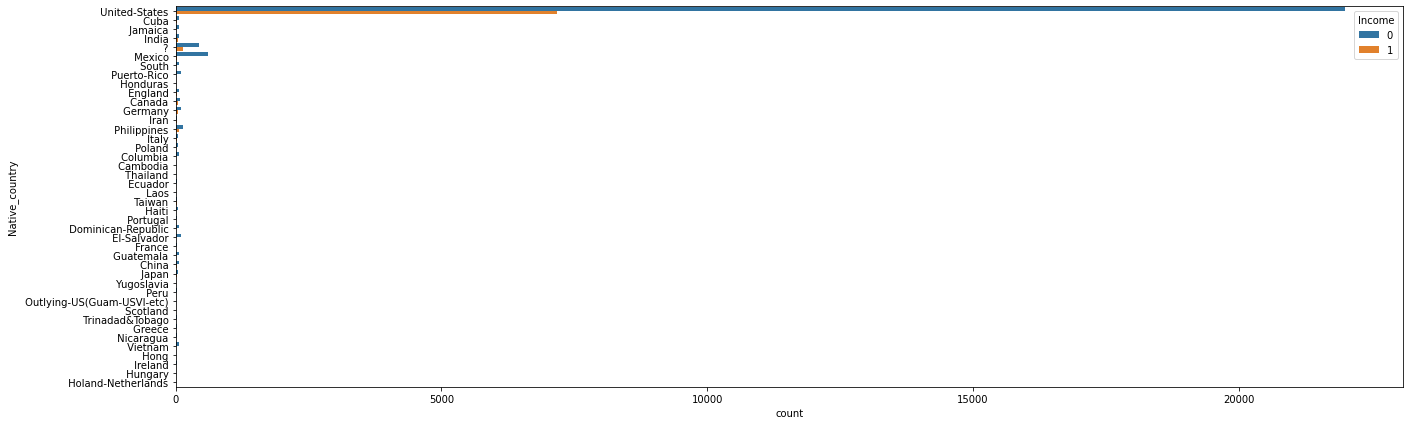

In [36]:
plt.figure(figsize=(22,7))
sns.countplot(y="Native_country",hue="Income",data=df)

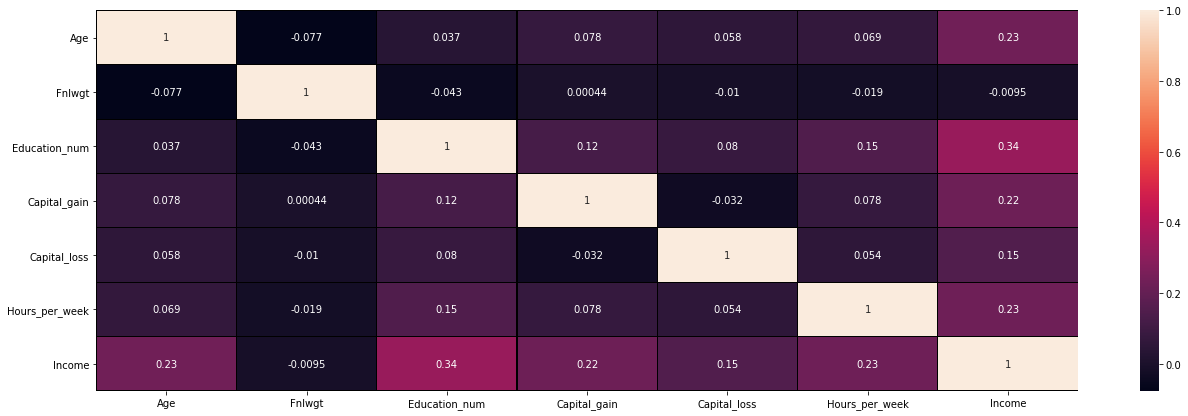

In [37]:
#Multivariate analysis
#Pearson correlation:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black")

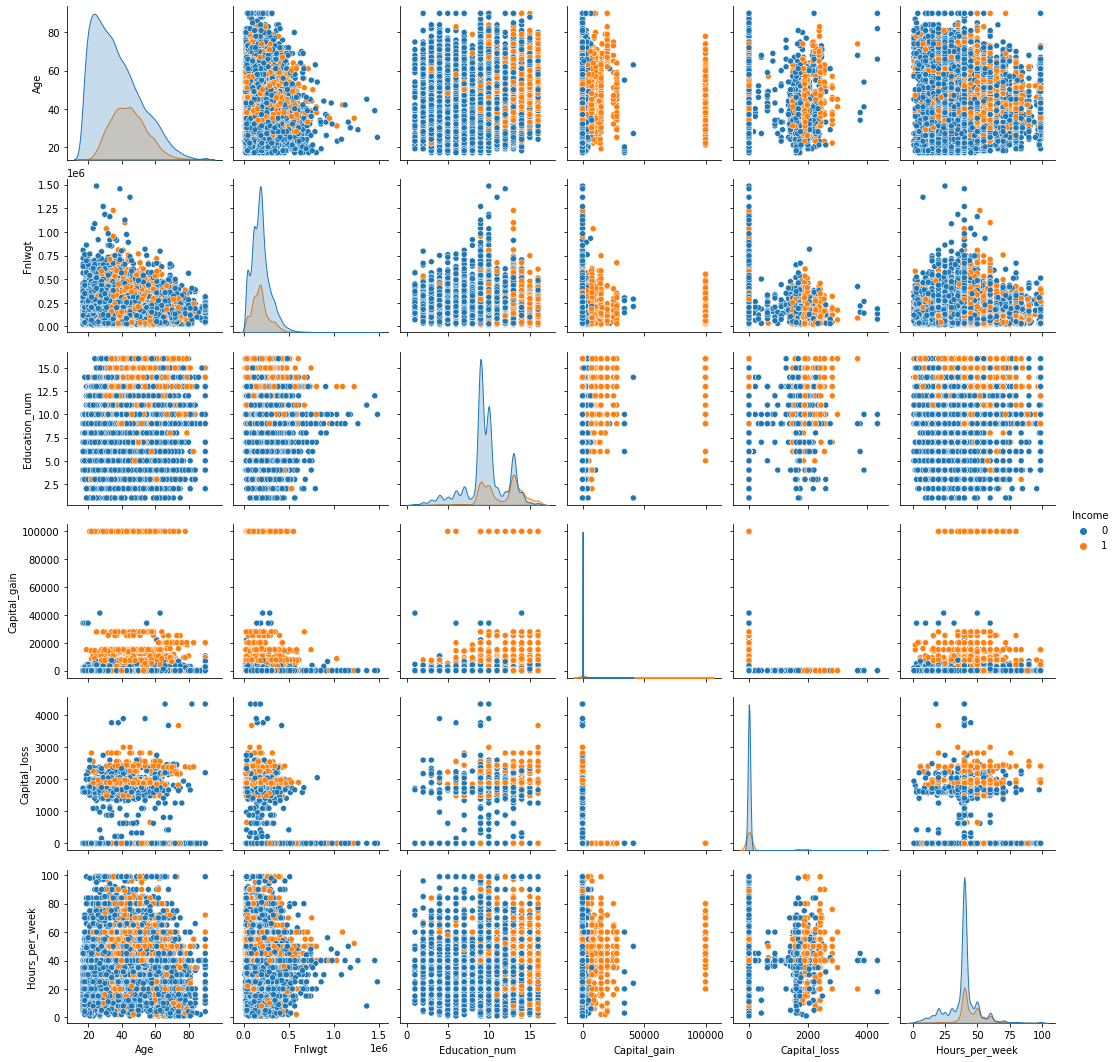

In [38]:
sns.pairplot(data=df,hue="Income")

# Preprocessing Pipeline

In [39]:
#1. Workclass
#Check values in Workclass
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [40]:
#Check for special characters
df["Workclass"].unique()
#Spaces found at beginning of datavalue

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [41]:
#Remove the spaces characters 
import re
df["Workclass"]=df["Workclass"].apply(lambda x:re.sub(' +',"",str(x)))
df["Workclass"].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [42]:
#Assuming people "without-pay" & "never-worker" will not have income
#Replace "Without-pay" & "Never-worked" by null values & then drop the,
df["Workclass"]=np.where(df["Workclass"]=="Without-pay",np.nan,df["Workclass"])
df["Workclass"]=np.where(df["Workclass"]=="Never-worked",np.nan,df["Workclass"])
#Replace special character "?" NaN & then remove
df["Workclass"]=np.where(df["Workclass"]=="?",np.nan,df["Workclass"])

In [43]:
df.shape

(32560, 15)

In [44]:
#Drop rows with NaN values
df.dropna(axis=0,inplace=True)

In [45]:
# Shape after removing null value
df.shape

(30703, 15)

In [46]:
print("Data loss in %:",((32560-30703)/32560)*100)

Data loss in %: 5.703316953316953


In [47]:
# Native Country
print(df["Native_country"].unique())
print(df["Native_country"].nunique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador'
 ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan'
 ' Yugoslavia' ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland'
 ' Trinadad&Tobago' ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland'
 ' Hungary' ' Holand-Netherlands']
42


In [48]:
#Remove the spaces characters 
import re
df["Native_country"]=df["Native_country"].apply(lambda x:re.sub(' +',"",str(x)))
df["Native_country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [49]:
#Replace special character "?" by NaN values 
df["Native_country"]=np.where(df["Native_country"]=="?",np.nan,df["Native_country"])

In [50]:
df.shape

(30703, 15)

In [51]:
#Drop NaN values
df.dropna(axis=0,inplace=True)

In [52]:
df.shape

(30147, 15)

In [53]:
print("Data loss in %:",((30703-30147)/30703)*100)

Data loss in %: 1.8108979578542814


In [54]:
#Check skewness
#Split dependent & independent variables
df_x=df.drop(columns=["Income"])
y=df["Income"]

In [55]:
#Now lets remove the skewness
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.cbrt(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.cbrt(df_x[index])

In [56]:
df_x.skew()

Age               0.063366
Fnlwgt           -0.160835
Education_num    -0.305482
Capital_gain      4.055148
Capital_loss      4.298821
Hours_per_week    0.331904
dtype: float64

In [57]:
df_x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,3.684031,Self-emp-not-inc,43.675121,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States
1,3.361975,Private,59.967204,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States
2,3.756286,Private,61.685627,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States
3,3.036589,Private,69.686283,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba
4,3.332222,Private,65.776255,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States


In [58]:
#Convert the categorical values into numeric
df_x=pd.get_dummies(df_x,drop_first=True)

In [59]:
#Data scaling to achieve more accuracy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,...,Native_country_Canada,Native_country_China,Native_country_Columbia,Native_country_Cuba,Native_country_Dominican-Republic,Native_country_Ecuador,Native_country_El-Salvador,Native_country_England,Native_country_France,Native_country_Germany,Native_country_Greece,Native_country_Guatemala,Native_country_Haiti,Native_country_Holand-Netherlands,Native_country_Honduras,Native_country_Hong,Native_country_Hungary,Native_country_India,Native_country_Iran,Native_country_Ireland,Native_country_Italy,Native_country_Jamaica,Native_country_Japan,Native_country_Laos,Native_country_Mexico,Native_country_Nicaragua,Native_country_Outlying-US(Guam-USVI-etc),Native_country_Peru,Native_country_Philippines,Native_country_Poland,Native_country_Portugal,Native_country_Puerto-Rico,Native_country_Scotland,Native_country_South,Native_country_Taiwan,Native_country_Thailand,Native_country_Trinadad&Tobago,Native_country_United-States,Native_country_Vietnam,Native_country_Yugoslavia
0,0.918999,-1.087016,1.128658,-0.280624,-0.222274,-2.332583,-0.271314,-1.683748,-0.192202,3.326203,-0.210402,-0.189776,-0.112533,-0.070951,-0.098211,-0.137075,-0.12379,-0.185896,-0.212883,2.231141,-0.112231,-0.695632,-0.238847,-0.038664,-0.135306,-0.533274,-0.026402,1.069872,-0.111318,-0.689865,-0.179301,-0.167842,-0.017281,-0.392761,2.559659,-0.183592,-0.216434,-0.264056,-0.345266,-0.069036,...,-0.059682,-0.047547,-0.04314,-0.055327,-0.047195,-0.02994,-0.05769,-0.053487,-0.02994,-0.065299,-0.03103,-0.045762,-0.037351,-0.00576,-0.019955,-0.025113,-0.02077,-0.05769,-0.037351,-0.028226,-0.047547,-0.051582,-0.044282,-0.023753,-0.143708,-0.033103,-0.021555,-0.031561,-0.079004,-0.04314,-0.033602,-0.060239,-0.019105,-0.048587,-0.037351,-0.023753,-0.024442,0.310891,-0.046124,-0.023044
1,0.081011,0.417036,-0.439851,-0.280624,-0.222274,-0.078080,-0.271314,0.593913,-0.192202,-0.300643,-0.210402,-0.189776,-0.112533,-0.070951,-0.098211,-0.137075,-0.12379,-0.185896,-0.212883,-0.448201,-0.112231,1.437541,-0.238847,-0.038664,-0.135306,-0.533274,-0.026402,-0.934692,-0.111318,-0.689865,-0.179301,-0.167842,-0.017281,-0.392761,-0.390677,-0.183592,4.620353,-0.264056,-0.345266,-0.069036,...,-0.059682,-0.047547,-0.04314,-0.055327,-0.047195,-0.02994,-0.05769,-0.053487,-0.02994,-0.065299,-0.03103,-0.045762,-0.037351,-0.00576,-0.019955,-0.025113,-0.02077,-0.05769,-0.037351,-0.028226,-0.047547,-0.051582,-0.044282,-0.023753,-0.143708,-0.033103,-0.021555,-0.031561,-0.079004,-0.04314,-0.033602,-0.060239,-0.019105,-0.048587,-0.037351,-0.023753,-0.024442,0.310891,-0.046124,-0.023044
2,1.107004,0.575677,-1.224105,-0.280624,-0.222274,-0.078080,-0.271314,0.593913,-0.192202,-0.300643,-0.210402,5.269366,-0.112533,-0.070951,-0.098211,-0.137075,-0.12379,-0.185896,-0.212883,-0.448201,-0.112231,-0.695632,-0.238847,-0.038664,-0.135306,-0.533274,-0.026402,1.069872,-0.111318,-0.689865,-0.179301,-0.167842,-0.017281,-0.392761,-0.390677,-0.183592,4.620353,-0.264056,-0.345266,-0.069036,...,-0.059682,-0.047547,-0.04314,-0.055327,-0.047195,-0.02994,-0.05769,-0.053487,-0.02994,-0.065299,-0.03103,-0.045762,-0.037351,-0.00576,-0.019955,-0.025113,-0.02077,-0.05769,-0.

In [60]:
#Tried Principal Component Analysis 
from sklearn.decomposition import PCA
pca=PCA(n_components=80)
pc_x=pca.fit_transform(x)

#Information retained in data after dimensionality reduction
print("Percentage info retained in data=",(sum(pca.explained_variance_ratio_)*100))

Percentage info retained in data= 95.79287323144418


In [61]:
print(pc_x.shape,y.shape)

(30147, 80) (30147,)


In [62]:
# Dealing data imbalance with under sampling and selecting the random sample for analysis.
from imblearn.under_sampling import RandomUnderSampler
rm=RandomUnderSampler(random_state=42)
x_res,y_res=rm.fit_resample(pc_x,y.values.ravel())

In [63]:
print('After OverSampling, the shape of x: {}'.format(x_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of x: (15016, 80)
After OverSampling, the shape of y: (15016,) 

After OverSampling, counts of label '1': 7508
After OverSampling, counts of label '0': 7508


In [64]:
y_res

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [65]:
y_res=y_res.reshape(-1,1)
y_res

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

 # Building Machine Learning Models

In [66]:
#Lets use f1-score,confusion matrix & classification report as metrics 
#User defined function for best random state & metrics
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf1=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf1:
            maxf1=tmp
            rs=r_state
    print("Maximum f1_score is at random state :",rs," and it is :",maxf1)
    print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
    print("Classification report \n",classification_report(y_test,y_pred))

In [67]:
#User defined function for cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5,scoring="f1")
    print("Mean f1 score for classifier: ",cv.mean())
    print(cv)

In [68]:
#1.Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
maxf1_score(dt,x_res,y_res)

Maximum f1_score is at random state : 56  and it is : 0.7619993379675605
Confusion matrix 
 [[1142  360]
 [ 396 1106]]
Classification report 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1502
           1       0.75      0.74      0.75      1502

    accuracy                           0.75      3004
   macro avg       0.75      0.75      0.75      3004
weighted avg       0.75      0.75      0.75      3004



In [69]:
#Cross validation of Decision tree classifier
cross_val(dt,x_res,y_res)

Mean f1 score for classifier:  0.7396309265759934
[0.74477265 0.73062731 0.73177258 0.74974671 0.74123539]


In [70]:
#2.Naive Bayes Classifier- GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
maxf1_score(gnb,x_res,y_res)

Maximum f1_score is at random state : 79  and it is : 0.7642651296829972
Confusion matrix 
 [[ 588  914]
 [ 153 1349]]
Classification report 
               precision    recall  f1-score   support

           0       0.79      0.39      0.52      1502
           1       0.60      0.90      0.72      1502

    accuracy                           0.64      3004
   macro avg       0.69      0.64      0.62      3004
weighted avg       0.69      0.64      0.62      3004



In [71]:
#Cross validation of Gaussian Naive Bayes
cross_val(gnb,x_res,y_res)

Mean f1 score for classifier:  0.7154984285970898
[0.71693122 0.73819274 0.71311258 0.71454593 0.69470968]


In [72]:
#3.KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
maxf1_score(kc,x_res,y_res)

Maximum f1_score is at random state : 53  and it is : 0.8047223994894703
Confusion matrix 
 [[1131  371]
 [ 289 1213]]
Classification report 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1502
           1       0.77      0.81      0.79      1502

    accuracy                           0.78      3004
   macro avg       0.78      0.78      0.78      3004
weighted avg       0.78      0.78      0.78      3004



In [73]:
#Cross validation of KNN classifier
cross_val(kc,x_res,y_res)

Mean f1 score for classifier:  0.7877158009007392
[0.78867803 0.78072763 0.79002625 0.78354554 0.79560155]


In [74]:
#4.Support Vector Classifier
from sklearn.svm import SVC
svc=SVC()
maxf1_score(svc,x_res,y_res)

Maximum f1_score is at random state : 49  and it is : 0.8326996197718631
Confusion matrix 
 [[1145  357]
 [ 207 1295]]
Classification report 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      1502
           1       0.78      0.86      0.82      1502

    accuracy                           0.81      3004
   macro avg       0.82      0.81      0.81      3004
weighted avg       0.82      0.81      0.81      3004



In [75]:
#Cross validation of Support vector classifier
cross_val(svc,x_res,y_res)

Mean f1 score for classifier:  0.8124453025788402
[0.81472161 0.81355932 0.81507506 0.81077694 0.80809358]


In [76]:
#5.Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
maxf1_score(rf_clf,x_res,y_res)

Maximum f1_score is at random state : 96  and it is : 0.8178217821782178
Confusion matrix 
 [[1193  309]
 [ 294 1208]]
Classification report 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1502
           1       0.80      0.80      0.80      1502

    accuracy                           0.80      3004
   macro avg       0.80      0.80      0.80      3004
weighted avg       0.80      0.80      0.80      3004



In [77]:
#Cross validation of Random forest classifier
cross_val(rf_clf,x_res,y_res)

Mean f1 score for classifier:  0.7990251078646984
[0.80105925 0.78676471 0.80478883 0.80066335 0.80184941]


In [78]:
#Hyper parameter tuning Support Vector Classifier
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x_res,y_res)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [79]:
#Using hyper-tuned parameters
sv=SVC(kernel="linear",C=1)
maxf1_score(sv,x_res,y_res)

Maximum f1_score is at random state : 49  and it is : 0.8356896010053408
Confusion matrix 
 [[1124  378]
 [ 194 1308]]
Classification report 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      1502
           1       0.78      0.87      0.82      1502

    accuracy                           0.81      3004
   macro avg       0.81      0.81      0.81      3004
weighted avg       0.81      0.81      0.81      3004



In [80]:
#Hyper parameter tuning
#Random Forest classifier
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [81]:
#Using hyper-tuned parameters
rfc=RandomForestClassifier(n_estimators=500)
maxf1_score(rfc,x_res,y_res)

Maximum f1_score is at random state : 43  and it is : 0.8193166885676741
Confusion matrix 
 [[1199  303]
 [ 275 1227]]
Classification report 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1502
           1       0.80      0.82      0.81      1502

    accuracy                           0.81      3004
   macro avg       0.81      0.81      0.81      3004
weighted avg       0.81      0.81      0.81      3004



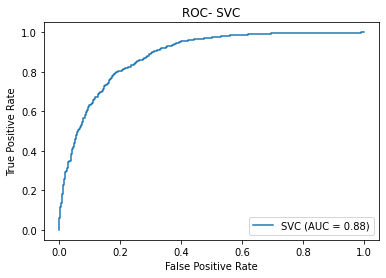

In [84]:
#AUC-ROC Curve (Support Vector)
from sklearn.metrics import plot_roc_curve
x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,random_state = 49,test_size=0.20)
sv.fit(x_train,y_train)
svc_disp = plot_roc_curve(sv, x_test, y_test)
plt.title("ROC- SVC")
plt.show()

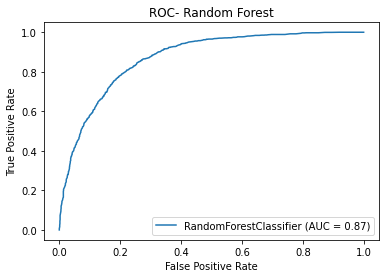

In [85]:
#AUC-ROC Curve (Random Forest)
from sklearn.metrics import plot_roc_curve
x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,random_state = 43,test_size=0.20)
rfc.fit(x_train,y_train)
rf_clf_disp = plot_roc_curve(rfc, x_test, y_test)
plt.title("ROC- Random Forest")
plt.show()


In [ ]:
#Conclusion: Support vector classifier has better F1 score and AUC. Hence we will save the SVC as final model

In [86]:
#Save the file
import joblib
joblib.dump(sv,"Census_income_classifier.joblib")

['Census_income_classifier.joblib']